In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [4]:
df=df.rename(columns={"v1":"label","v2":"text"})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# train test and split
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df["text"],df["label"],test_size=0.2,random_state=10)

C:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
x_train.shape

(4457,)

In [7]:
x_test.shape

(1115,)

In [8]:
y_train.shape

(4457,)

In [9]:
y_test.shape

(1115,)

In [10]:
#text transformation
from sklearn.feature_extraction.text import CountVectorizer


In [11]:
vect=CountVectorizer()

In [12]:
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
vect.get_feature_names()[0:20]

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703']

In [14]:
x_train_def=vect.transform(x_train)
type(x_train_def)

scipy.sparse.csr.csr_matrix

In [15]:
x_test_def=vect.transform(x_test)
type(x_test_def)

scipy.sparse.csr.csr_matrix

In [16]:
spam=df[df.label==1]
ham=df[df.label==0]

In [17]:
spam_words=''
ham_words=''

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
for val in spam.text:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    #tokens=[words for words in tokens if words not in stopwords.words('english')]
    for w in tokens:
        spam_words=spam_words + w + ' '
    
    


In [20]:
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '


In [22]:
#from wordcloud import WordCloud

In [23]:
import os
os.path

<module 'ntpath' from 'C:\\anaconda\\lib\\ntpath.py'>

In [24]:
#Generate a word cloud image

#spam_wordcloud = WordCloud(width=400,height=200).generate(spam_words)
#ham_wordcloud=WordCLoud(width=400,height=200).generate(ham_words)

In [25]:
#Spam Word cloud
#plt.figure( figsize=(10,8), facecolor='k')
#plt.imshow(spam_wordcloud)
#plt.axis("off")
#plt.tight_layout(pad=0)
#plt.show()

#Ham word cloud
#plt.figure( figsize=(10,8), facecolor='k')
#plt.imshow(ham_wordcloud)
#plt.axis("off")
#plt.tight_layout(pad=0)
#plt.show()



In [47]:
#Machine Learning models

#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

multinb=MultinomialNB()
multinb.fit(x_train_def,y_train)




MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
predictedy=dict()
predictedy["Multinomial"] =multinb.predict(x_test_def)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [50]:
accuracy_score(predictedy["Multinomial"] ,y_test)

0.98834080717488793

In [51]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train_def,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
predictedy["Logistic"]=model.predict(x_test_def)
accuracy_score(predictedy["Logistic"],y_test)

0.98026905829596411

In [54]:
#kNN Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_def,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
predictedy["knn"]=knn.predict(x_test_def)
accuracy_score(predictedy["knn"],y_test)

0.91210762331838569

In [56]:
#Ensemble Classifier

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train_def,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
predictedy["Random Forest"]=model.predict(x_test_def)
accuracy_score(predictedy["Random Forest"],y_test)

0.96860986547085204

In [58]:
#Parameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
k_range = np.arange(1,30)
k_range


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [59]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)


{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [60]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(x_train_def,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [62]:
grid.best_params_

{'n_neighbors': 1}

In [63]:
grid.grid_scores_

C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94615, std: 0.00449, params: {'n_neighbors': 1},
 mean: 0.92259, std: 0.00288, params: {'n_neighbors': 2},
 mean: 0.92349, std: 0.00226, params: {'n_neighbors': 3},
 mean: 0.90554, std: 0.00117, params: {'n_neighbors': 4},
 mean: 0.90621, std: 0.00065, params: {'n_neighbors': 5},
 mean: 0.89410, std: 0.00060, params: {'n_neighbors': 6},
 mean: 0.89455, std: 0.00062, params: {'n_neighbors': 7},
 mean: 0.88580, std: 0.00141, params: {'n_neighbors': 8},
 mean: 0.88602, std: 0.00142, params: {'n_neighbors': 9},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 10},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 11},
 mean: 0.87660, std: 0.00210, params: {'n_neighbors': 12},
 mean: 0.87705, std: 0.00230, params: {'n_neighbors': 13},
 mean: 0.87256, std: 0.00223, params: {'n_neighbors': 14},
 mean: 0.87278, std: 0.00253, params: {'n_neighbors': 15},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 16},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 17},
 mean:

In [64]:
#Model Evaluation
print(classification_report(y_test, predictedy['Multinomial'], target_names = ["ham", "spam"]))


             precision    recall  f1-score   support

        ham       0.99      0.99      0.99       965
       spam       0.97      0.95      0.96       150

avg / total       0.99      0.99      0.99      1115



Text(0.5,15,'Predicted label')

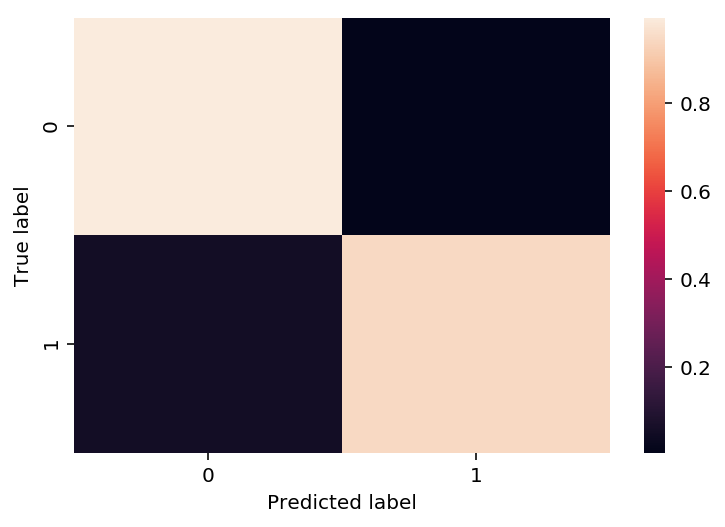

In [65]:
conf_mat = confusion_matrix(y_test, predictedy['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [66]:
print(conf_mat)

[[960   5]
 [  8 142]]


In [67]:
pd.set_option('display.max_colwidth', -1) 

In [70]:
x_test[y_test < predictedy["Multinomial"] ] #Misclassified as Spam

573     Waiting for your call.                                                                                                      
4727    I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
5475    Dhoni have luck to win some big title.so we will win:)                                                                      
4860    Nokia phone is lovly..                                                                                                      
1259    We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us                           
Name: text, dtype: object

In [71]:
x_test[y_test > predictedy["Multinomial"] ] #Misclassified as NOT Spam

5035    You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt       
2574    Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.   
3130    LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
68      Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"                                                                            
2662    Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?                          
4211    Missed call alert. These numbers called but left no message. 07008009200                                                                                    
3572    Yo